---
title: "Heart Disease Classification Assignment 6"
subtitle: Homework Assignment 6
author: 
  - name: "Yichen Shen"
    id: "400379853"
  - name: "Yanxi Xiong"
    id: "400428267"
  - name: ""
    id: ""
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true  
fontsize: 11pt
linestretch: 1.5
mainfont: "Times New Roman"
geometry: margin=1in
---



Yichen Shen 400379853  
Yanxi Xiong 400428267


\newpage

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv',header=None,encoding='latin1')
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.columns=columns
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


## Q1

This classification problem uses the UCI Heart Disease Dataset to determine whether a patient has heart disease.  
The input includes 14 features such as age, sex, oldpeak and thalach. The target variables indicate heart diseas status, o means no disease and 1 means presence of disease.  
The model is trained to classify new patient cases based on these predictors.

## Q2

In [3]:
df=df.apply(pd.to_numeric,errors='coerce')
numerical_cols=df.select_dtypes(include=[np.number]).columns
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

# I did the standardized transformation to improve the model performance.

## Q3

In [4]:
print("The data type of the dataset is \n",df.dtypes)
print("\n")
print("Variables in the dataset is \n",df.columns.tolist())
print("\n")
print("Number of observations in the dataset is \n",len(df))


The data type of the dataset is 
 age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object


Variables in the dataset is 
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


Number of observations in the dataset is 
 304


The dataset includes 304 observations with 14 features, where num is the response variable, indicating the presence or absence of heart disease. The remaining 13 variables represent medical features such as age, cholesterol lever.  
All columns are successfully converted to numerical format for modeling purpose, showing float64 types across the dataset. This can help compatibility with machine learning.  
The variables show a diverse range of values. For instance, age ranges from young adults to elderly patients, while chol and thalach span a wide range of clinical readings. This means that the dataset captures a broad spectrum of patient conditions.

## Q4

In [5]:
df['num']=np.where(df['num']>0,1,0)
df['num'].unique()

array([0, 1])

## Q5

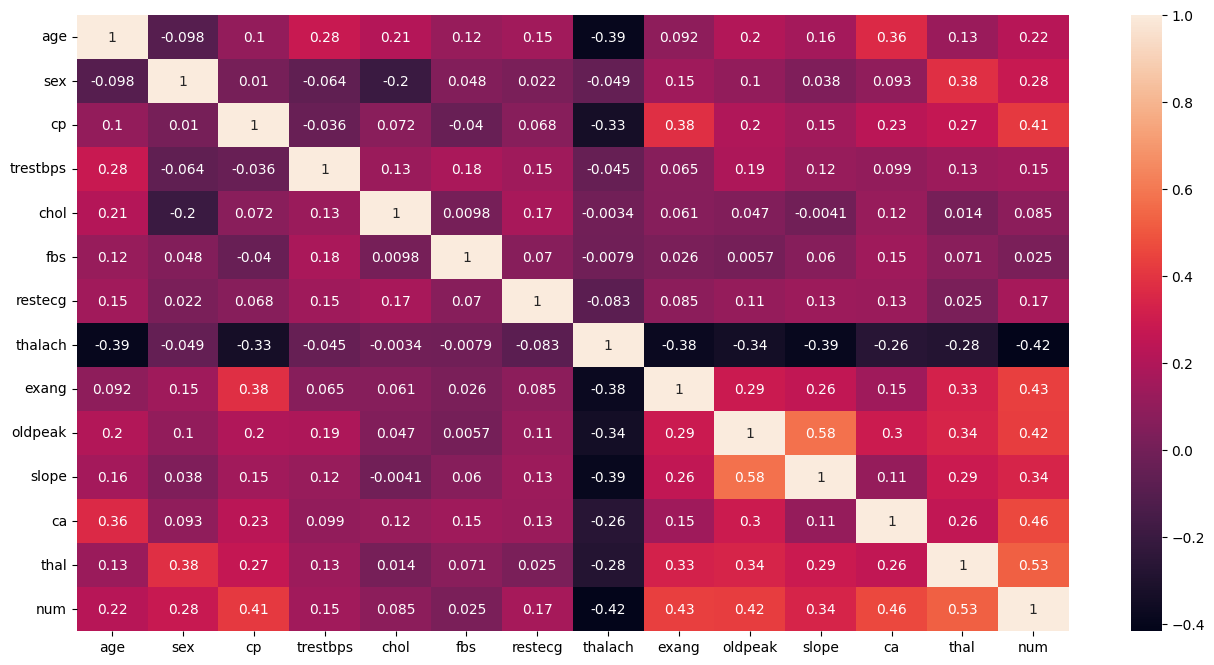

In [6]:
plt.figure(figsize=(16,8))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

The target variable num has the strongest positive correlation with thal(0.53),ca(0.46)and exang(0.43). These features are potentially informative for predicting heart disease and should be prioritized in feature selection or included in any dimensionality reduction technique.  
There is a strong correlation between oldpeak and slope(0.58), and between thal and cp(0.27). Such relationships may indicate redundancy, and in feature extraction processes, one of the variables can be dropped to reduce multicollinearty.

## Q6

In [7]:
original_count=len(df)
df=df[(df['ca']!='?')&(df['thal']!='?')]
missing_count=original_count-len(df)
print("observation count after removing missing values:",len(df))

observation count after removing missing values: 304


## Q7

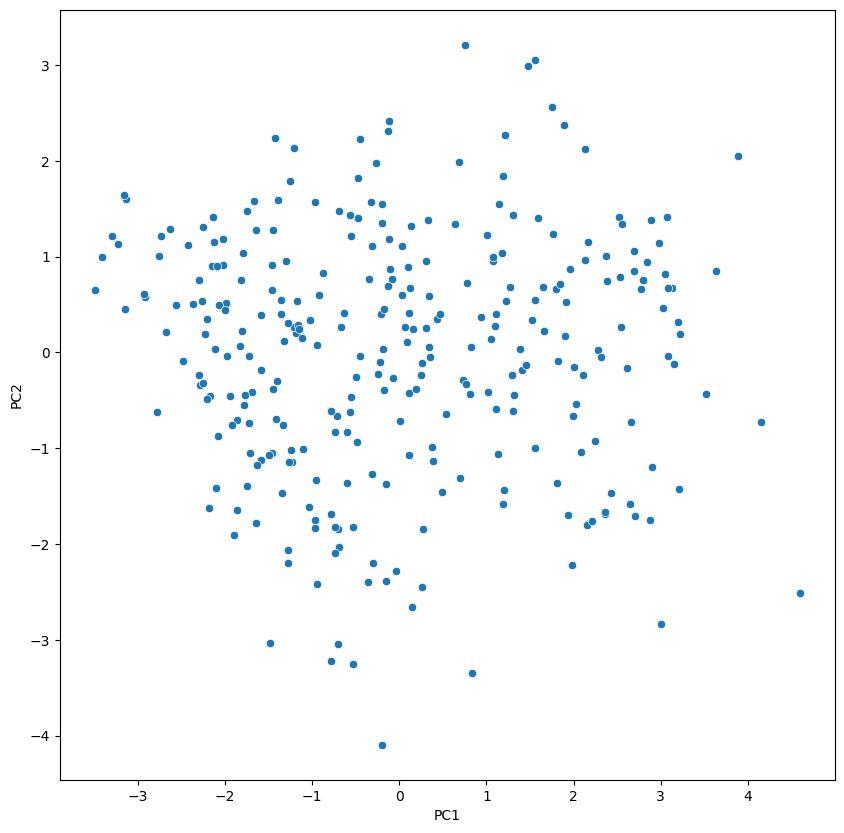

In [8]:
plt.figure(figsize=(10,10))
pca=PCA(n_components=2)
pca_input=df.drop(['num'],axis=1).dropna()
reduced_data=pca.fit_transform(pca_input)
df_reduced=pd.DataFrame(reduced_data,columns=['PC1','PC2'])
sns.scatterplot(data=df_reduced,x='PC1',y='PC2')
plt.show()

## Q8

In [9]:
X=df.drop('num',axis=1)
y=df['num']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Q9
Random forest is an interpretable model that uses feature to intuitively understand the relative significance of features in influencing the prediction results.
Decision tree classifiers can generate easily understandable decision rules and handle non-linear relationship well.

## Q10
Select accuracy and recall rate
Accuracy:The proportion of correctly predicted samples to the total number of samples ,calculated as (correctly predicted samples)/(total samples)
Recall rate:The proportion of actual positive samples that are correctly predicted as positive samples,calculated as(true cases)/(true cases plus false negative cases)

## Q11

In [12]:
#random forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_features=5,
    max_depth=5,
    random_state=1,
    bootstrap=True,
    oob_score=True
)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=5, oob_score=True,
                       random_state=1)

In [15]:
#decision tree
tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    random_state=1
)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=1)

## Q12

In [17]:
imputer = SimpleImputer(strategy='mean')
X_train_im = imputer.fit_transform(X_train)
X_test_im = imputer.transform(X_test)


selector = SelectKBest(score_func=f_classif,k=5)
X_train_sele = selector.fit_transform(X_train_im,y_train)
X_test_sele = selector.transform(X_test_im)

new_tree = DecisionTreeClassifier(
    max_depth = 5,
    random_state = 1
)
new_tree.fit(X_train_sele,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

# Q13

In [22]:
# Random Forest model
y_pre_rf = rf.predict(X_test)
y_pre_tree = tree.predict(X_test)
y_pre_new_tree = new_tree.predict(X_test_sele)
accuracy_rf = accuracy_score(y_test,y_pre_rf)
recall_rf = recall_score(y_test,y_pre_rf)

print(accuracy_rf)
print(recall_rf)

0.8586956521739131
0.7317073170731707


Accuracy of Random forest is 0.8587. Recall rate of Random forest is 0.7317.

In [23]:
#Decision Tree without feature
accuracy_tree = accuracy_score(y_test,y_pre_tree)
recall_tree = recall_score(y_test,y_pre_tree)

print(accuracy_tree)
print(recall_tree)

0.782608695652174
0.6585365853658537


Accuracy of decision tree without feature selection is 0.7826
Recall rate of decision tree without feature selection is 0.6585

In [25]:
#Decision Tree with features
accuracy_new_tree = accuracy_score(y_test,y_pre_new_tree)
recall_new_tree = recall_score(y_test,y_pre_new_tree)

print(accuracy_new_tree)
print(recall_new_tree)

0.7717391304347826
0.6341463414634146


Accuracy of decision tree with feature selection is 0.7717
Recall rate of decision tree with feature selection is 0.6341

We can analyse the performance of three models that are random forest classifier, a decision tree using all features,and a decision tree with selected features. The Random forest model has a relatively high level of accuracy,reaching accuracy 0.8587, and a recalll rate of 0.7317. The decision tree without feature selection has an accuracy of 0.7826 and a recall rate of 0.6585,which is slightly lower. The decision tree with feature selection shows slightly worse,with 0.7717 accuracy and 0.6341 recall rate.

Finding:1) The random forest model achieves the best performance in both accuracy and recall rate, indicating that it has strong generalization ablility. 2) The basic decision tree model performs slightly worse, while the decision tree with feature selection performs lowest,indicating that the model should make trade-off. While feature election can reduce dimensionality, it may discard useful information.

Impact of feature selection: feature selection helps to reduce dimensionality and simplify the model, improving interpretablility and reducing ovwefitting potentially while maintaining relatively good performance.

## Q14

In [31]:
#Random Forest
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
imp_vars = feature_imp.abs().sort_values(ascending = False).head(3)

print(imp_vars.index.tolist())


['cp', 'thal', 'ca']


In [ ]:
#Decision Tree
feature_imp = pd.DataFrame({'feature':X_train.columns,
                            "importance":tree.feature_importances_})
sort_imp = feature_imp.sort_values(by='importance', ascending= False)
imp_vars = sort_imp.head(3)

print(imp_vars['feature'].tolist())

['cp', 'ca', 'oldpeak']


: 

For the random forest model, the most important features are cp,thal, and ca. These variables have the highest importance scores. It impact on predicting heaet disease outcomes.

For the decision tree model, the top features are cp, ca and old peak. The overlap of cp and ca in both models reinforces their relevance, while the presence of oldpeak in the decision tree highlights how individual models might prioritize different patterns when making splits. The overlap of cp and ca in both models reinforces their relevance. These results support the medical relevance of the model.

These results comfirm the clinical significance of these predictors. Features such as the type of chest pain (cp) are medically correlated with heart abnormalities, and machine learning models indentify them as key indicators.

## Q15

In [42]:
# NA dealing
imputer = SimpleImputer(strategy = 'mean')
X_train_im = imputer.fit_transform(X_train)
X_test_im = imputer.transform(X_test)

kmeans = KMeans(n_clusters = 2, random_state=1)
subgroup_lables = kmeans.fit_predict(X_train_im)

In [52]:
#Divide the training set into subgroups
sg1_mtrain = subgroup_lables==0
sg2_mtrain = subgroup_lables==1

X_train_sg1 = X_train[sg1_mtrain]
y_train_sg1 = y_train[sg1_mtrain]
X_train_sg2 = X_train[sg2_mtrain]
y_train_sg2 = y_train[sg2_mtrain]

In [47]:
#Train DT for each subgroup

tree_sg1 = DecisionTreeClassifier(random_state=1)
tree_sg2 = DecisionTreeClassifier(random_state=1)

tree_sg1.fit(X_train_sg1,y_train_sg1)
tree_sg2.fit(X_train_sg2,y_train_sg2)


DecisionTreeClassifier(random_state=1)

In [ ]:
#Cluster prediction of test set
sg_label_test = kmeans.predict(X_test_im)

print(sg_label_test)

[0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]


In [50]:
#divide the test set into sg
sg1_mtest = sg_label_test == 0
sg2_mtest = sg_label_test == 1

X_test_sg1 = X_test[sg1_mtest]
y_test_sg1 = y_test[sg1_mtest]
X_test_sg2 = X_test[sg2_mtest]
y_test_sg2 = y_test[sg2_mtest]

In [53]:
#predict the test set for each subgroup
y_psg1 = tree_sg1.predict(X_test_sg1)
y_psg2 = tree_sg2.predict(X_test_sg2)

In [54]:
#The accuracy and recall of each sg
accuracy_sg1 = accuracy_score(y_test_sg1,y_psg1)
recall_sg1 = recall_score(y_test_sg1,y_psg1)

print(accuracy_sg1,recall_sg1)

0.7049180327868853 0.38461538461538464


In [55]:
accuracy_sg2 = accuracy_score(y_test_sg2,y_psg2)
recall_sg2 = recall_score(y_test_sg2,y_psg2)

print(accuracy_sg2,recall_sg2)

0.8387096774193549 0.9285714285714286


The results show that sugroup 1 has an accuracy of 0.7049 and a recall rate of 0.3846, while subgroup 2 has an accuracy of 0.8387 and recall rate of 0.9286. Subgroup 2 is significantly better than subgroup 1. Compared to a single decision tree in Q13 (accuracy = 0.7826, recall = 0.6585),subgroup 2 has a significany improvement in recall rate(0.9286). Despite the decrease in recall for subgroup 1, the overall strategy shows the potential of subgroup-specific modeling.
The high recall rate of subgroup2 shows that the model can capture the more accurately positive cases in this cluster. Sunbgroup 2 should require more turning.